# Path Visualization

Garrett Lappe - garrett.l.lappe@gmail.com

This notebook performs some data transformation and plots the mouse paths that were collected.

Mostly used for EDA and data validation.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_dir = 'data\\'

In [5]:
df = pd.read_csv(data_dir + 'button_log_2020-01-26.csv', header=None)
df.columns = ['button_id','action','x','y','t','button_x','button_y','button_width','button_height']

In [6]:
df.head()

,button_id,action,x,y,t,button_x,button_y,button_width,button_height
0,1,MOVE,498,14,0.156879,158,406,21,39
1,1,MOVE,498,15,0.158863,158,406,21,39
2,1,MOVE,498,16,0.160863,158,406,21,39
3,1,MOVE,497,18,0.164872,158,406,21,39
4,1,MOVE,497,19,0.166865,158,406,21,39


In [7]:
button_start_df = df.sort_values(by='t').groupby(['button_x',
                                                  'button_y',
                                                  'button_width',
                                                  'button_height']).first().reset_index()
button_start_df.columns = ['start_' + c for c in button_start_df.columns.values]
button_start_df

,start_button_x,start_button_y,start_button_width,start_button_height,start_button_id,start_action,start_x,start_y,start_t
0,89,451,36,18,47,MOVE,900,351,0.156007
1,121,341,67,98,2,MOVE,167,428,0.145884
2,124,317,91,78,50,MOVE,254,227,0.239265
3,158,406,21,39,1,MOVE,498,14,0.156879
4,161,192,96,74,6,MOVE,381,197,0.097436
5,194,365,70,53,42,MOVE,383,367,0.221312
6,221,307,29,63,9,MOVE,363,215,0.003000
7,225,182,52,67,49,MOVE,815,389,0.210192
8,229,360,49,73,36,MOVE,499,267,0.209555
9,230,362,28,92,32,MOVE,977,343,0.184963


### Adding start_x and start_y

In [8]:
df = df.merge(button_start_df, 
              left_on=['button_x',
                       'button_y',
                       'button_width',
                       'button_height'], 
              right_on=['start_button_x',
                        'start_button_y',
                        'start_button_width',
                        'start_button_height']).drop(columns=['start_button_x',
                                                              'start_button_y',
                                                              'start_button_width',
                                                              'start_button_height',
                                                              'start_t',
                                                              'start_button_id',
                                                              'start_action'])
df

,button_id,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y
0,1,MOVE,498,14,0.156879,158,406,21,39,498,14
1,1,MOVE,498,15,0.158863,158,406,21,39,498,14
2,1,MOVE,498,16,0.160863,158,406,21,39,498,14
3,1,MOVE,497,18,0.164872,158,406,21,39,498,14
4,1,MOVE,497,19,0.166865,158,406,21,39,498,14
...,...,...,...,...,...,...,...,...,...,...,...
7895,50,MOVE,163,344,0.577575,124,317,91,78,254,227
7896,50,MOVE,163,345,0.584577,124,317,91,78,254,227
7897,50,MOVE,162,345,0.597580,124,317,91,78,254,227
7898,50,MOVE,162,346,0.599503,124,317,91,78,254,227


### Enumerating each path

In [9]:
buttons = df[['button_x',
              'button_y',
              'button_width',
              'button_height']].drop_duplicates().reset_index(drop=True).reset_index()
buttons

,index,button_x,button_y,button_width,button_height
0,0,158,406,21,39
1,1,121,341,67,98
2,2,256,456,89,38
3,3,551,431,28,16
4,4,345,158,57,65
5,5,161,192,96,74
6,6,295,437,83,23
7,7,327,190,63,30
8,8,221,307,29,63
9,9,532,312,66,39


In [10]:
df.drop(columns='button_id', axis=1, inplace=True)  # button_id resets every time the GUI is run (50 buttons)
df.head()

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y
0,MOVE,498,14,0.156879,158,406,21,39,498,14
1,MOVE,498,15,0.158863,158,406,21,39,498,14
2,MOVE,498,16,0.160863,158,406,21,39,498,14
3,MOVE,497,18,0.164872,158,406,21,39,498,14
4,MOVE,497,19,0.166865,158,406,21,39,498,14


### Adding true button id (index) to data

In [11]:
df = df.merge(buttons, on=['button_x',
                           'button_y',
                           'button_width',
                           'button_height'])
df

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y,index
0,MOVE,498,14,0.156879,158,406,21,39,498,14,0
1,MOVE,498,15,0.158863,158,406,21,39,498,14,0
2,MOVE,498,16,0.160863,158,406,21,39,498,14,0
3,MOVE,497,18,0.164872,158,406,21,39,498,14,0
4,MOVE,497,19,0.166865,158,406,21,39,498,14,0
...,...,...,...,...,...,...,...,...,...,...,...
7895,MOVE,163,344,0.577575,124,317,91,78,254,227,49
7896,MOVE,163,345,0.584577,124,317,91,78,254,227,49
7897,MOVE,162,345,0.597580,124,317,91,78,254,227,49
7898,MOVE,162,346,0.599503,124,317,91,78,254,227,49


### Making a new DataFrame for each path

In [12]:
path_dfs = [df[df['index']==i] for i in set(df['index'].values)]

In [13]:
path_dfs[0]  # path #1

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y,index
0,MOVE,498,14,0.156879,158,406,21,39,498,14,0
1,MOVE,498,15,0.158863,158,406,21,39,498,14,0
2,MOVE,498,16,0.160863,158,406,21,39,498,14,0
3,MOVE,497,18,0.164872,158,406,21,39,498,14,0
4,MOVE,497,19,0.166865,158,406,21,39,498,14,0
...,...,...,...,...,...,...,...,...,...,...,...
205,MOVE,167,426,0.682667,158,406,21,39,498,14,0
206,MOVE,167,427,0.688720,158,406,21,39,498,14,0
207,MOVE,167,428,0.719411,158,406,21,39,498,14,0
208,MOVE,167,429,0.732417,158,406,21,39,498,14,0


In [14]:
path_dfs[1]  # path #2

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y,index
210,MOVE,167,428,0.145884,121,341,67,98,167,428,1
211,MOVE,167,427,0.149824,121,341,67,98,167,428,1
212,MOVE,167,426,0.150856,121,341,67,98,167,428,1
213,MOVE,168,426,0.152828,121,341,67,98,167,428,1
214,MOVE,169,424,0.154828,121,341,67,98,167,428,1
215,MOVE,170,422,0.158829,121,341,67,98,167,428,1
216,MOVE,171,421,0.163831,121,341,67,98,167,428,1
217,MOVE,171,420,0.164858,121,341,67,98,167,428,1
218,MOVE,172,419,0.166831,121,341,67,98,167,428,1
219,MOVE,173,418,0.170843,121,341,67,98,167,428,1


### Visualization

In [15]:
import pylab

In [16]:
# plots the outline of the button based on its location and dimensions
#
def plot_button(button_x, button_y, button_width, button_height):
    top_x = list(range(button_x, button_x + button_width))
    top_y = [button_y]*button_width
    
    left_y = list(range(button_y, button_y + button_height))
    left_x = [button_x]*button_height
    
    right_y = list(range(button_y, button_y + button_height))
    right_x = [button_x + button_width]*button_height
    
    bottom_x = list(range(button_x, button_x + button_width))
    bottom_y = [button_y + button_height]*button_width
    
    # testing - combine and plot all edge points together
    #all_x = top_x + right_x + bottom_x + left_x
    #all_y = top_y + right_y + bottom_y + left_y
    #pylab.plot(all_x, all_y)
    
    pylab.plot(top_x, top_y)
    pylab.plot(bottom_x, bottom_y)
    pylab.plot(right_x, right_y)
    pylab.plot(left_x, left_y)

In [17]:
import os

Path 0


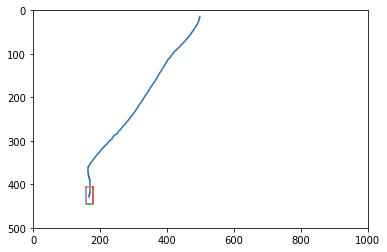

Path 1


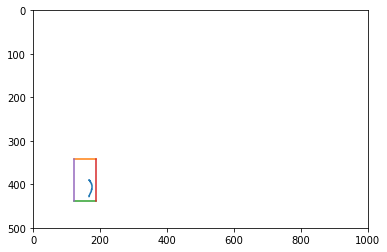

Path 2


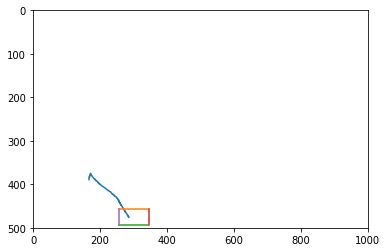

Path 3


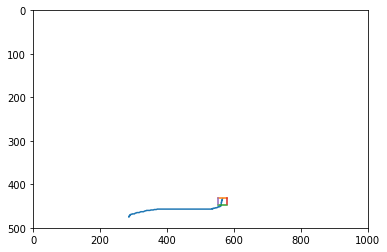

Path 4


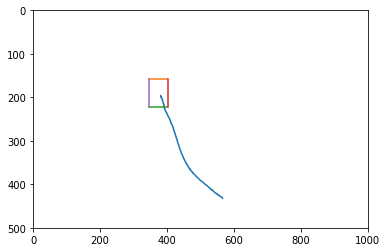

Path 5


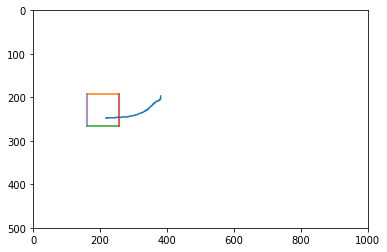

Path 6


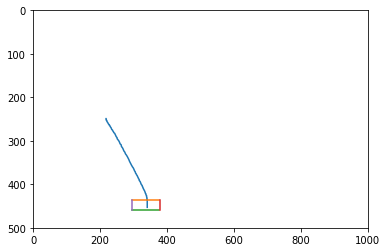

Path 7


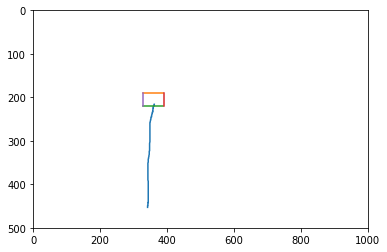

Path 8


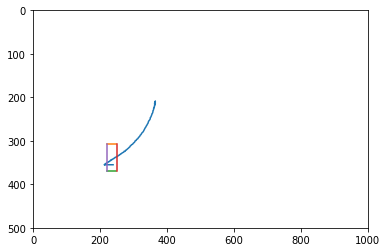

Path 9


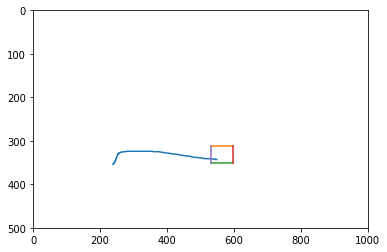

Path 10


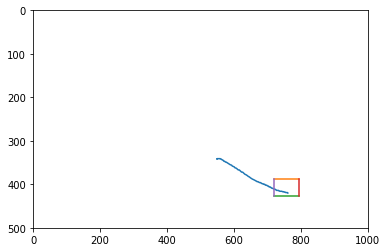

Path 11


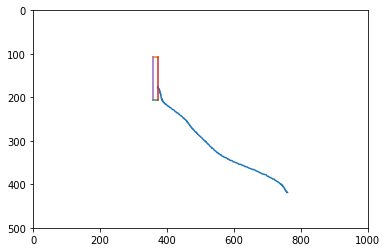

Path 12


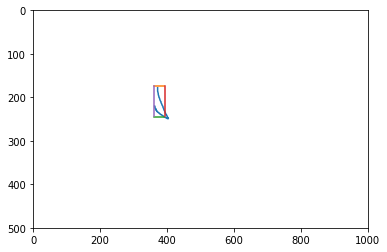

Path 13


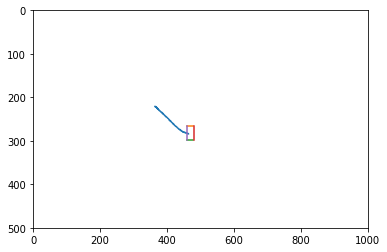

Path 14


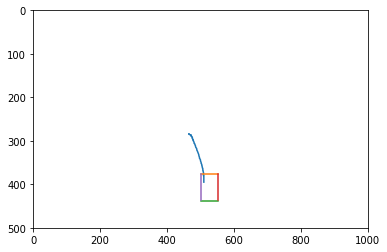

Path 15


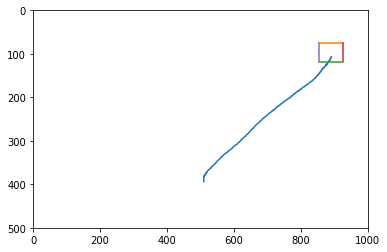

Path 16


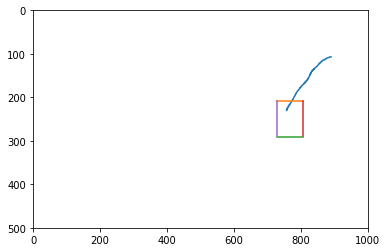

Path 17


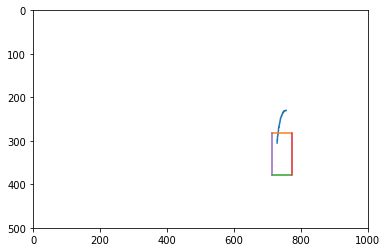

Path 18


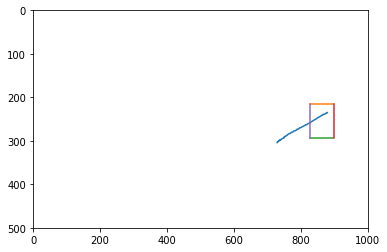

Path 19


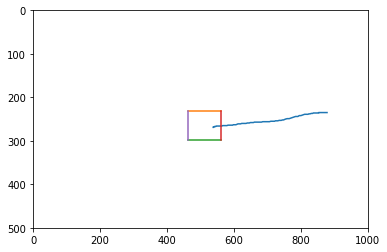

Path 20


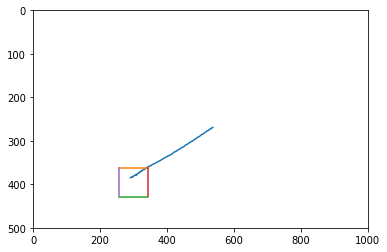

Path 21


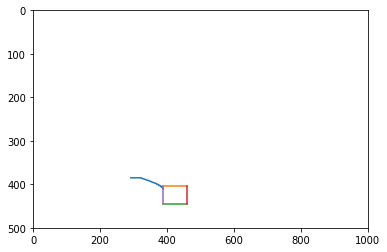

Path 22


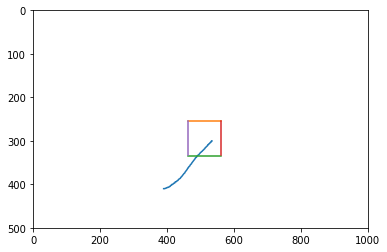

Path 23


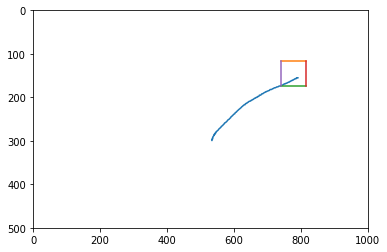

Path 24


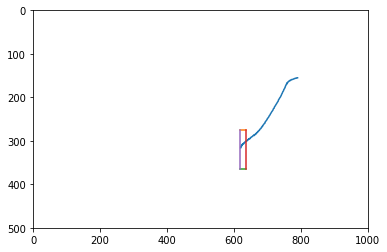

Path 25


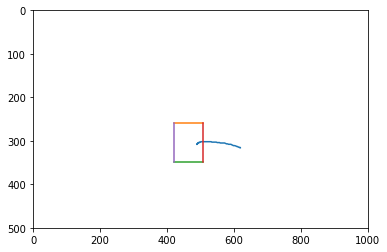

Path 26


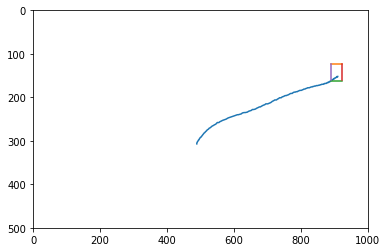

Path 27


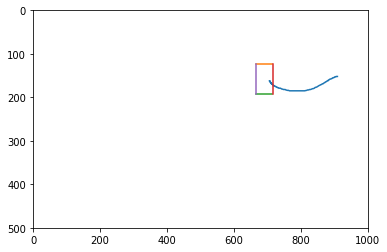

Path 28


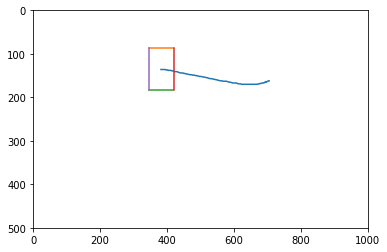

Path 29


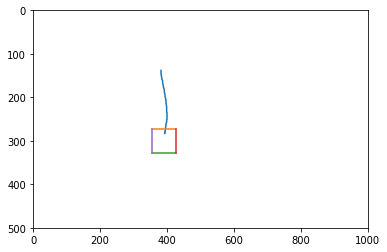

Path 30


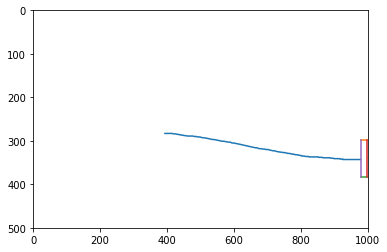

Path 31


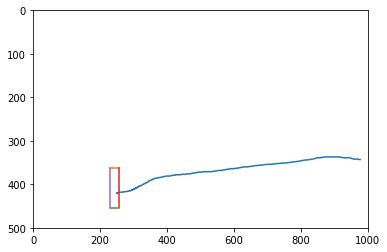

Path 32


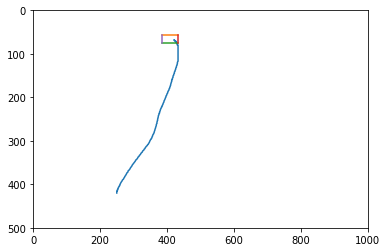

Path 33


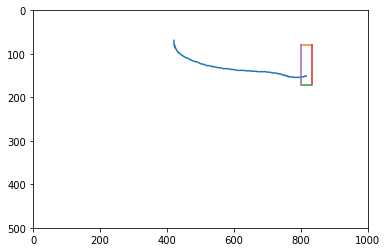

Path 34


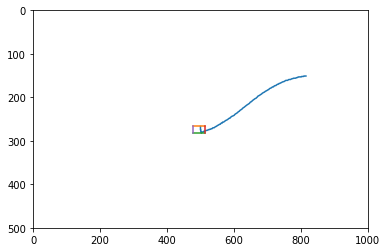

Path 35


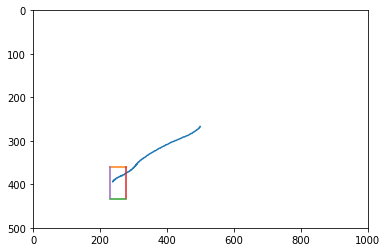

Path 36


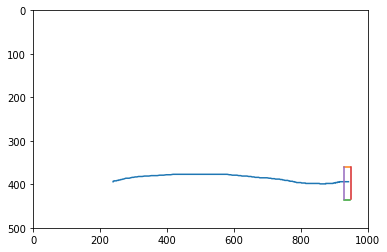

Path 37


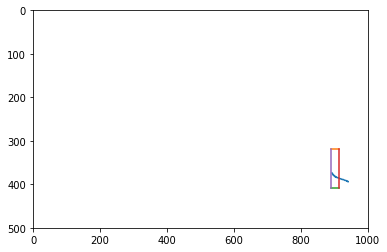

Path 38


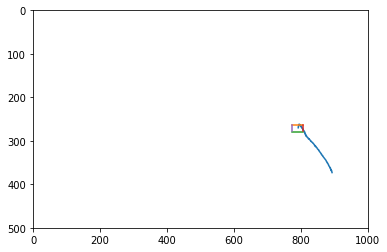

Path 39


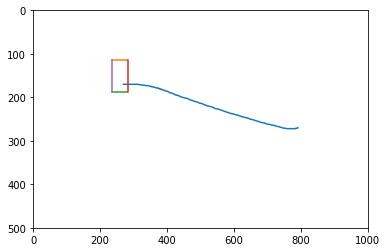

Path 40


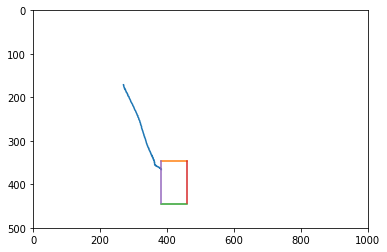

Path 41


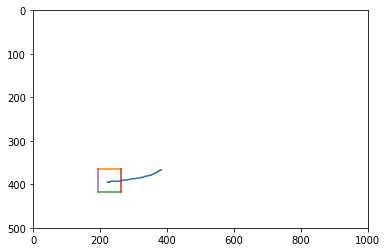

Path 42


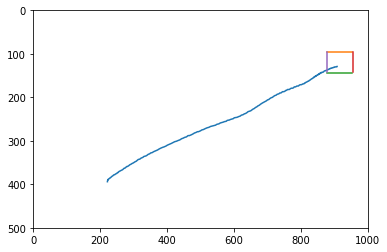

Path 43


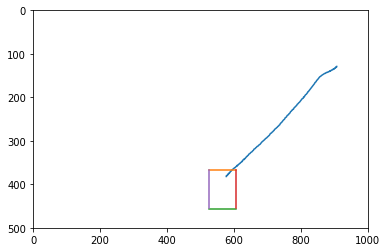

Path 44


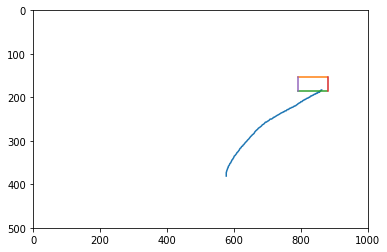

Path 45


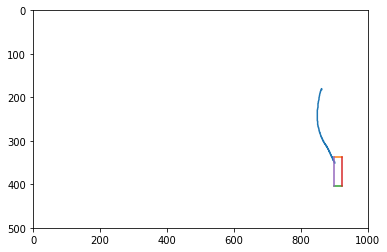

Path 46


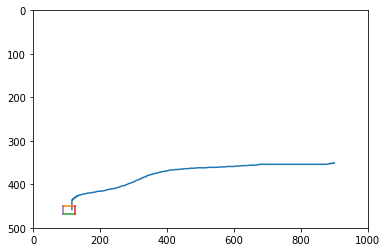

Path 47


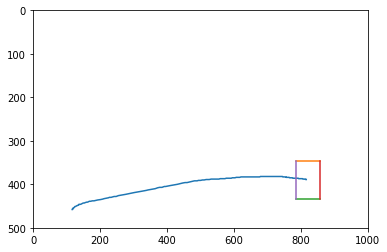

Path 48


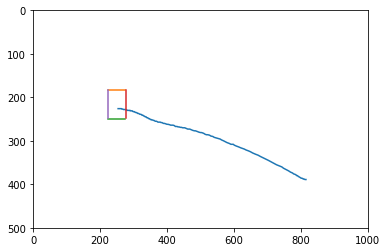

Path 49


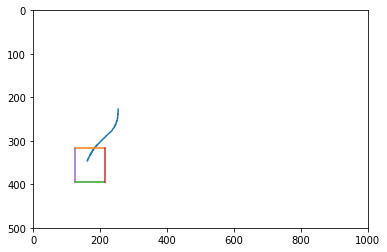

In [18]:
img_dir = 'path_imgs\\'
if not os.path.exists(img_dir):
    os.mkdir(img_dir)

for i in range(len(path_dfs)):
    print('Path', i)
    pylab.plot(path_dfs[i].x, path_dfs[i].y)
    
    # fix axes limits
    pylab.ylim([500,0])
    pylab.xlim([0,1000])
    
    pylab.axis('off')  # save img only the blue mouse path
    pylab.savefig('path_imgs\\path_{}.jpg'.format(i))  # save the image before plotting the button
    
    plot_button(path_dfs[i].button_x.iloc[0],
                path_dfs[i].button_y.iloc[0],
                path_dfs[i].button_width.iloc[0],
                path_dfs[i].button_height.iloc[0])
    
    pylab.axis('on')  # turn back on for visualization
    pylab.show()